In [0]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [0]:
from google.colab import files
uploaded = files.upload()

Saving Data1_2col.csv to Data1_2col (3).csv


In [0]:
import pandas as pd
data = pd.read_csv('Data1_2col.csv', engine="python")

In [5]:
print(data.shape)
print(data.columns)
import numpy as np
data['Article Abstract'].replace('', np.nan, inplace=True)
data.dropna(subset=['Article Abstract'], inplace=True)
print(data.shape)

(24566, 2)
Index(['Article Abstract', 'Impact Factor'], dtype='object')
(20144, 2)


In [6]:
data['Impact Factor'].replace('',np.nan, inplace = True)
data.dropna(subset=['Impact Factor'], inplace = True)
print(data.shape)
print(type(data))

(20127, 2)
<class 'pandas.core.frame.DataFrame'>


In [7]:
df = data[data['Article Abstract'].apply(lambda x: len(x.split(' ')) > 25)]
df['Article Abstract'] = df['Article Abstract'].str.replace(r'(formula: see text)','')
print(df.shape)
data = df
print(data.shape)
data = data.drop_duplicates(subset="Article Abstract")
print(data.shape)

(20079, 2)
(20079, 2)
(20077, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
print(data.shape)
X, y = (data['Article Abstract'].values, data['Impact Factor'].values)
print(X)
print(type(X))

(20077, 2)
['A simple, highly sensitive and reproducible method for the assay of gamma-glutamyl transpeptidase (EC 2.3.2-) activity is introduced, using gamma-glutamyl-p-nitroanilide as a substrate and glycylglycine as an acceptor in 50 g/l of polyoxyethylene nonylphenol. Serum transpeptidase activity was assayed in 1080 healthy adults, the normal mean value being 14.8 mU/ml. The diagnostic evaluation of the enzyme in various hepatobiliary diseases is also discussed.'
 'Conditions are described in which the pneumococcal mutant strain sulr-c, resistant to the drug sulfanilamide, gives rise to sensitive segregants resistant to nitrobenzoic acid at a frequency constant with time. This segregant frequency is markedly enhanced upon exposure of the cells to doses of ultraviolet light or mitomycin C that permit survival of 50% to 90% of the cells. Treatment with acridine orange diminishes the segregant frequency. From the known influences of these three agents on genetic recombination, we pro

In [9]:
import string
text = [word for word in X if word not in string.ascii_letters]

print(len(text))
jbjb = max(text, key=len)
print((jbjb))

20077
Ginkgo biloba extract has been used primarily as a medicinal agent in the treatment or prevention of cardiovascular and cerebrovascular dysfunction. Ginkgo biloba extract was nominated for study by the National Cancer Institute because of its widespread use as an herbal supplement to promote mental function and the limited availability of toxicity and carcinogenicity data. Furthermore, one of the major ingredients in Ginkgo biloba extract, quercetin, is a known mutagen. The Ginkgo biloba extract used in the current studies was procured from a supplier known to provide material to United States companies and contained 31.2% flavonol glycosides, 15.4% terpene lactones (6.94% bilo-balide, 3.74% ginkgolide A, 1.62% ginkgolide B, 3.06% ginkgolide C), and 10.45 ppm ginkgolic acid. Male and female F344/N rats and B6C3F1/N mice were administered Ginkgo biloba extract in corn oil by gavage for 3 months or 2 years. Genetic toxicology studies were conducted in Salmonella typhimurium, Escher

In [10]:
#Number of unique characters 
new=set()
for word in text:
    for letter in word:
        new.add(letter)
print(len(new))

260


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tk = Tokenizer(lower = True)
tk.fit_on_texts(text)
X_seq = tk.texts_to_sequences(text)
X_pad = pad_sequences(X_seq, maxlen=1560, padding='post')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.25, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

Using TensorFlow backend.


(15057, 1560)
(15057,)
(5020, 1560)
(5020,)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 1560
embedding_size = 100
model = Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [15]:
model.summary()
history = model.fit(X_train, y_train,validation_data= (X_test,y_test), epochs=20, batch_size= 1000)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1560, 100)         8971600   
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 9,052,101
Trainable params: 9,052,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 292s 18s/step - loss: 0.6158 - accuracy: 0.5392 - val_loss: 0.5995 - val_accuracy: 0.5382
Epoch 2/20
16/16 [==============================] - 294s 18s/step - loss: 0.6059 - accuracy: 0.5392 - 

In [0]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_train = sqrt(mean_squared_error(y_train, trainPredict))
print('RMSE: %.3f' % rmse_train)
rmse_test = sqrt(mean_squared_error(y_test, testPredict))
print('RMSE: %.3f' % rmse_test)

RMSE: 0.803
RMSE: 0.799


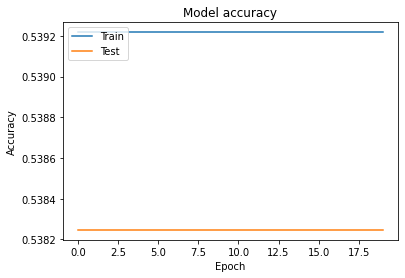

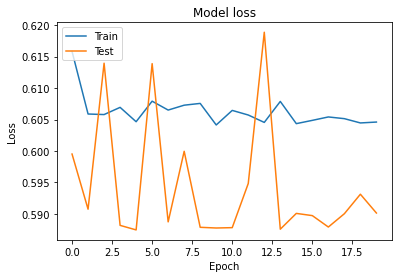

In [22]:
from matplotlib import pyplot
# Plot training & validation accuracy values
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('Model accuracy')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Test'], loc='upper left')
pyplot.show()

# Plot training & validation loss values
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model loss')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.legend(['Train', 'Test'], loc='upper left')
pyplot.show()

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
#pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [47]:
scores = model.evaluate(X_test, y_test, verbose = 0)
print(scores[1])

0.5382469892501831


In [0]:
#Model with minimum word length 150
df2 = data[data['Article Abstract'].apply(lambda x: len(x.split(' ')) > 150)]
df2['Article Abstract'] = df2['Article Abstract'].str.replace(r'(formula: see text)','')
print(df2.shape)
data2 = df2
print(data2.shape)
data2 = data2.drop_duplicates(subset="Article Abstract")
print(data2.shape)

print(data2.shape)
X2, y2 = (data2['Article Abstract'].values, data2['Impact Factor'].values)
print(X2)
print(type(X2))

import string
text2 = [word2 for word2 in X2 if word2 not in string.ascii_letters]

print(len(text2))
jbjb2 = max(text2, key=len)
print((jbjb2))

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
tk2 = Tokenizer(lower = True)
tk2.fit_on_texts(text2)
X_seq2 = tk2.texts_to_sequences(text2)
X_pad2 = pad_sequences(X_seq2, maxlen=1560, padding='post')
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pad2, y2, test_size = 0.25, random_state = 1)

print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
vocabulary_size2 = len(tk2.word_counts.keys())+1
max_words = 1560
embedding_size = 100
model2 = Sequential()
model2.add(Embedding(vocabulary_size2, embedding_size, input_length=max_words))
model2.add(LSTM(200))
model2.add(Dropout(0.25))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
model2.summary()
hist = model2.fit(X_train2, y_train2, epochs=3, batch_size= 1000)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 1560, 100)         8114500   
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               240800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 8,355,501
Trainable params: 8,355,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
12/12 [==============================] - 347s 29s/step - loss: 0.6289 - accuracy: 0.5274
Epoch 2/3
12/12 [==============================] - 350s 29s/step - loss: 0.6157 - accuracy: 0.5391
Epoch 3/3
12/12 [===========================

NameError: ignored

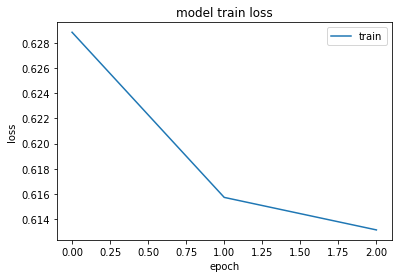

In [57]:
from matplotlib import pyplot
pyplot.plot(hist.history['loss'])
#pyplot.plot(history.history['val_loss'])
pyplot.title('model train loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [59]:
scores = model2.evaluate(X_test2, y_test2, verbose = 0)
print(scores[1])

0.5376226902008057


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 1560
embedding_size = 100
modelg1 = Sequential()
modelg1.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
modelg1.add(GRU(200))
modelg1.add(Dropout(0.25))
modelg1.add(Dense(1, activation='softmax'))
modelg1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
modelg1.summary()
hist1 = modelg1.fit(X_train, y_train, epochs=3, batch_size= 1000)
from matplotlib import pyplot
pyplot.plot(history.hist1['loss'])
#pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 1560, 100)         8971600   
_________________________________________________________________
gru (GRU)                    (None, 200)               181200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 9,153,001
Trainable params: 9,153,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
16/16 [==============================] - 370s 23s/step - loss: 4.4460 - accuracy: 0.5392
Epoch 2/3


KeyboardInterrupt: ignored

In [0]:
 np.random.seed(7)
batch_size = 1000
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 1560
embedding_size = 32
model1 = Sequential()
model1.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model1.add(LSTM(200))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer= 'SGD', metrics=['accuracy'])

In [0]:
model1.summary()
history = model1.fit(X_train, y_train, epochs=2, batch_size= 100)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 1560, 32)          2871488   
_________________________________________________________________
lstm_10 (LSTM)               (None, 200)               186400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 201       
Total params: 3,058,089
Trainable params: 3,058,089
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
151/151 [==============================] - 630s 4s/step - loss: 0.6369 - accuracy: 0.5364
Epoch 2/2
151/151 [==============================] - 624s 4s/step - loss: 0.6063 - accuracy: 0.5381


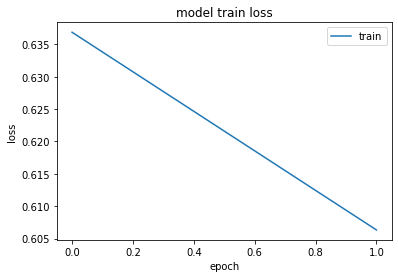

In [0]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
#pyplot.plot(history.history['val_loss'])
pyplot.title('model train loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train'], loc='upper right')
pyplot.show()

In [0]:
batch_size = 1000
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 1560
embedding_size = 32
t1 = Sequential()
t1.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
t1.add(LSTM(256))
t1.add(Dropout(0.4))
t1.add(Dense(1, activation='sigmoid'))
t1.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [0]:
t1.summary()
t1.fit(X_train, y_train, epochs=10, batch_size= 1000)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 1560, 32)          2871936   
_________________________________________________________________
lstm_11 (LSTM)               (None, 256)               295936    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 3,168,129
Trainable params: 3,168,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
63/63 [==============================] - 725s 12s/step - loss: nan - accuracy: 0.5263
Epoch 2/10
63/63 [==============================] - 726s 12s/step - loss: nan - accuracy: 0.5247
Epoch 3/10
63/63 [=============================

In [0]:
scores = model1.evaluate(X_test, y_test, verbose = 0)
print(scores[1])

0.3938942551612854


In [0]:
data.to_csv('text.csv')

In [0]:
model2 = Sequential()
model2.add(Embedding(vocabulary_size, embedding_size,input_length=max_words))
model2.add(LSTM(50,return_sequences=True))
model2.add(LSTM(50))
model2.add(Dense(50,activation='relu'))
model2.add(Dense(1,activation='softmax'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 1560, 32)          2871488   
_________________________________________________________________
lstm_17 (LSTM)               (None, 1560, 50)          16600     
_________________________________________________________________
lstm_18 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 2,910,889
Trainable params: 2,910,889
Non-trainable params: 0
_________________________________________________________________


In [0]:
history2 = model2.fit(X_train, y_train, epochs=10, batch_size= 500)

Epoch 1/10
31/31 [==============================] - 211s 7s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 2/10
31/31 [==============================] - 212s 7s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 3/10
31/31 [==============================] - 216s 7s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 4/10
31/31 [==============================] - 211s 7s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 5/10
31/31 [==============================] - 211s 7s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 6/10
31/31 [==============================] - 211s 7s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 7/10
31/31 [==============================] - 210s 7s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 8/10
31/31 [==============================] - 207s 7s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 9/10
31/31 [==============================] - 211s 7s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 10/10
31/31 [==============================] - 217s 7s/step - loss: 4.4372 - accuracy: 0.5381


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
vocabulary_size = len(tk.word_counts.keys())+1
max_words = 1560
embedding_size = 32
t1 = Sequential()
t1.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
t1.add(LSTM(300))
t1.add(Dropout(0.6))
t1.add(Dense(1, activation='softmax'))
t1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
t1.summary()
t1.fit(X_train, y_train, epochs=10, batch_size= 1000)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1560, 32)          2871488   
_________________________________________________________________
lstm (LSTM)                  (None, 300)               399600    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 3,271,389
Trainable params: 3,271,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
151/151 [==============================] - 1262s 8s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 2/10
151/151 [==============================] - 1272s 8s/step - loss: 4.4372 - accuracy: 0.5381
Epoch 3/10
151/151 [====================

KeyboardInterrupt: ignored

In [15]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
val = pd.read_csv('val.csv', engine="python")

Saving val.csv to val.csv


In [19]:
val.columns

Index(['Article ID', 'Article Abstract', 'Author Department', 'Author School',
       'Impact Factor'],
      dtype='object')

In [23]:
print(val.shape)
print(val.columns)
import numpy as np
val['Article Abstract'].replace('', np.nan, inplace=True)
val.dropna(subset=['Article Abstract'], inplace=True)
print(val.shape)

val['Impact Factor'].replace('',np.nan, inplace = True)
val.dropna(subset=['Impact Factor'], inplace = True)
print(val.shape)
print(type(val))

(2172, 5)
Index(['Article ID', 'Article Abstract', 'Author Department', 'Author School',
       'Impact Factor'],
      dtype='object')
(2172, 5)
(2172, 5)
<class 'pandas.core.frame.DataFrame'>


In [24]:
xv = val[val['Article Abstract'].apply(lambda x: len(x.split(' ')) > 50)]
xv['Article Abstract'] = xv['Article Abstract'].str.replace(r'(formula: see text)','')
print(xv.shape)
print(xv.shape)
xv = xv.drop_duplicates(subset="Article Abstract")
print(xv.shape)
xv = xv[~(xv == 0).any(axis=1)]
print(xv.shape)

(2131, 5)
(2131, 5)
(2130, 5)
(1486, 5)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
X2, y2 = (xv['Article Abstract'].values, xv['Impact Factor'].values)
print(X2)
print(type(X2))

import string
text2 = [word2 for word2 in X2 if word2 not in string.ascii_letters]

['The heart is one of the most vital organs in the human body, which actively pumps the blood through the vascular network to supply nutrients to as well as to extract wastes from all other organs, maintaining the homeostasis of the biological system. Over the past few decades, tremendous efforts have been exerted in engineering functional cardiac tissues for heart regeneration via biomimetic approaches. More recently, progress has been made toward the transformation of knowledge obtained from cardiac tissue engineering to building physiologically relevant microfluidic human heart models (i.e. heart-on-chips) for applications in drug discovery. The advancement in stem cell technologies further provides the opportunity to create personalized in vitro models from cells derived from patients. Here, starting from heart biology, we review recent advances in engineering cardiac tissues and heart-on-a-chip platforms for their use in heart regeneration and cardiotoxic/cardiotherapeutic drug sc

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
tk2 = Tokenizer(lower = True)
tk2.fit_on_texts(text2)
X_seq2 = tk2.texts_to_sequences(text2)
X_pad2 = pad_sequences(X_seq2, maxlen=1560, padding='post')
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pad2, y2, test_size = 0.25, random_state = 1)

print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
vocabulary_size2 = len(tk2.word_counts.keys())+1
max_words = 1560
embedding_size = 100
model4 = Sequential()
model4.add(Embedding(vocabulary_size2, embedding_size, input_length=max_words))
model4.add(LSTM(200))
model4.add(Dropout(0.25))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model4.summary()
model4.fit(X_train, y_train, epochs=10, batch_size= 1000)